In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import os

# Menampilkan informasi file CSV yang akan digabungkan
data_dir = 'data/'
csv_files = ['email_spam_indo.csv', 'sms_spam_indo.csv', 'spam.csv']

print("File CSV yang akan digabungkan:")
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path)
        print(f"- {file}: {len(df_temp)} baris")
    else:
        print(f"- {file}: File tidak ditemukan")

File CSV yang akan digabungkan:
- email_spam_indo.csv: 2636 baris
- sms_spam_indo.csv: 1143 baris
- spam.csv: 2636 baris


In [2]:
# Menggabungkan semua file CSV
combined_data = []

# Membaca dan menggabungkan setiap file
for file in csv_files:
    file_path = os.path.join(data_dir, file)

    if os.path.exists(file_path):
        # Baca CSV
        df = pd.read_csv(file_path)

        # Tambahkan kolom sumber untuk identifikasi asal data
        df['source'] = file.replace('.csv', '')

        # Tambahkan ke list
        combined_data.append(df)

        print(f"Berhasil membaca {file}: {len(df)} baris")
    else:
        print(f"File {file} tidak ditemukan!")

# Gabungkan semua dataframe
if combined_data:
    combined_df = pd.concat(combined_data, ignore_index=True)

    print(f"\n=== HASIL PENGGABUNGAN ===")
    print(f"Total baris: {len(combined_df)}")
    print(f"Total kolom: {len(combined_df.columns)}")
    print(f"Kolom yang tersedia: {list(combined_df.columns)}")

    # Tampilkan info dataset
    print(f"\n=== DISTRIBUSI DATA ===")
    print("Berdasarkan kategori:")
    print(combined_df['Kategori'].value_counts())

    print("\nBerdasarkan sumber:")
    print(combined_df['source'].value_counts())

    # Tampilkan beberapa contoh data
    print(f"\n=== CONTOH DATA ===")
    print(combined_df.head())

else:
    print("Tidak ada data yang berhasil dibaca!")

Berhasil membaca email_spam_indo.csv: 2636 baris
Berhasil membaca sms_spam_indo.csv: 1143 baris
Berhasil membaca spam.csv: 2636 baris

=== HASIL PENGGABUNGAN ===
Total baris: 6415
Total kolom: 3
Kolom yang tersedia: ['Kategori', 'Pesan', 'source']

=== DISTRIBUSI DATA ===
Berdasarkan kategori:
Kategori
spam    3310
ham     3105
Name: count, dtype: int64

Berdasarkan sumber:
source
email_spam_indo    2636
spam               2636
sms_spam_indo      1143
Name: count, dtype: int64

=== CONTOH DATA ===
  Kategori                                              Pesan           source
0     spam  Secara alami tak tertahankan identitas perusah...  email_spam_indo
1     spam  Fanny Gunslinger Perdagangan Saham adalah Merr...  email_spam_indo
2     spam  Rumah -rumah baru yang luar biasa menjadi muda...  email_spam_indo
3     spam  4 Permintaan Khusus Pencetakan Warna Informasi...  email_spam_indo
4     spam  Jangan punya uang, dapatkan CD perangkat lunak...  email_spam_indo


In [3]:
# Menyimpan dataset gabungan
output_file = 'data/combined_dataset.csv'

if 'combined_df' in locals():
    # Simpan ke file CSV
    combined_df.to_csv(output_file, index=False)
    print(f"Dataset gabungan berhasil disimpan ke: {output_file}")

    # Verifikasi file yang disimpan
    saved_df = pd.read_csv(output_file)
    print(f"Verifikasi: File tersimpan dengan {len(saved_df)} baris dan {len(saved_df.columns)} kolom")

    # Tampilkan statistik akhir
    print(f"\n=== STATISTIK AKHIR ===")
    print(f"Total data: {len(combined_df)}")
    print(f"Data spam: {len(combined_df[combined_df['Kategori'] == 'spam'])}")
    print(f"Data ham: {len(combined_df[combined_df['Kategori'] == 'ham'])}")

    # Cek missing values
    print(f"\n=== CEK DATA KOSONG ===")
    print(combined_df.isnull().sum())

else:
    print("Dataset gabungan tidak tersedia!")

Dataset gabungan berhasil disimpan ke: data/combined_dataset.csv
Verifikasi: File tersimpan dengan 6415 baris dan 3 kolom

=== STATISTIK AKHIR ===
Total data: 6415
Data spam: 3310
Data ham: 3105

=== CEK DATA KOSONG ===
Kategori    0
Pesan       0
source      0
dtype: int64


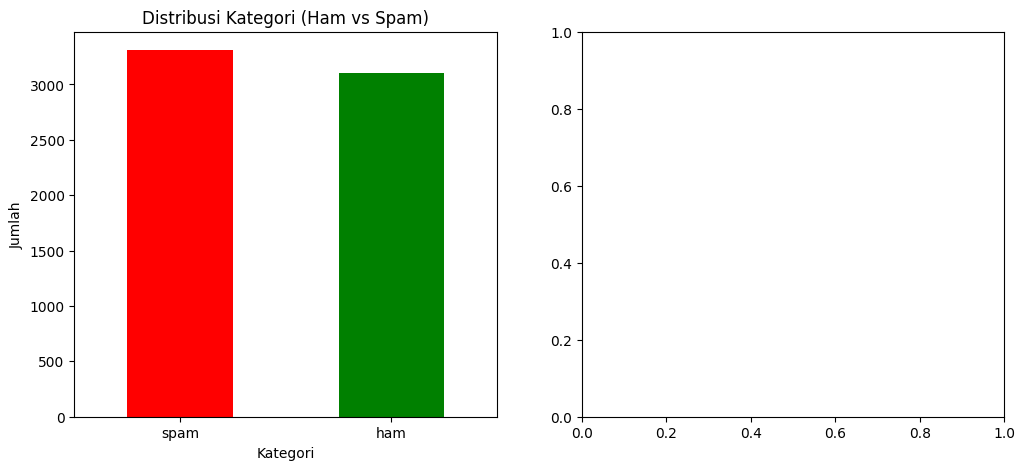

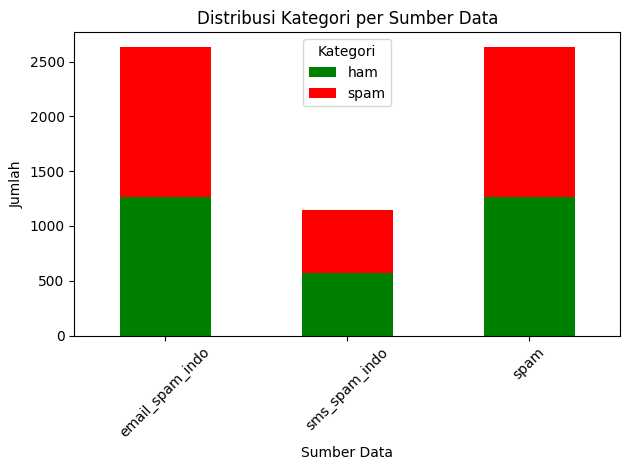


=== STATISTIK PANJANG PESAN ===
Rata-rata panjang pesan: 1236.92 karakter
Median panjang pesan: 667.00 karakter
Panjang pesan terpendek: 3 karakter
Panjang pesan terpanjang: 33531 karakter

=== PANJANG PESAN BERDASARKAN KATEGORI ===
                 mean  median  min    max
Kategori                                 
ham       1337.254106   800.0    3  33531
spam      1142.805438   548.0    6  29757


In [4]:
# Eksplorasi data lebih lanjut
import matplotlib.pyplot as plt
import seaborn as sns

if 'combined_df' in locals():
    # Visualisasi distribusi kategori
    plt.figure(figsize=(12, 5))

    # Plot 1: Distribusi kategori secara keseluruhan
    plt.subplot(1, 2, 1)
    combined_df['Kategori'].value_counts().plot(kind='bar', color=['red', 'green'])
    plt.title('Distribusi Kategori (Ham vs Spam)')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=0)

    # Plot 2: Distribusi kategori per sumber
    plt.subplot(1, 2, 2)
    category_source = pd.crosstab(combined_df['source'], combined_df['Kategori'])
    category_source.plot(kind='bar', stacked=True, color=['green', 'red'])
    plt.title('Distribusi Kategori per Sumber Data')
    plt.xlabel('Sumber Data')
    plt.ylabel('Jumlah')
    plt.legend(title='Kategori')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Statistik panjang pesan
    combined_df['panjang_pesan'] = combined_df['Pesan'].str.len()

    print(f"\n=== STATISTIK PANJANG PESAN ===")
    print(f"Rata-rata panjang pesan: {combined_df['panjang_pesan'].mean():.2f} karakter")
    print(f"Median panjang pesan: {combined_df['panjang_pesan'].median():.2f} karakter")
    print(f"Panjang pesan terpendek: {combined_df['panjang_pesan'].min()} karakter")
    print(f"Panjang pesan terpanjang: {combined_df['panjang_pesan'].max()} karakter")

    # Panjang pesan berdasarkan kategori
    print(f"\n=== PANJANG PESAN BERDASARKAN KATEGORI ===")
    panjang_stats = combined_df.groupby('Kategori')['panjang_pesan'].agg(['mean', 'median', 'min', 'max'])
    print(panjang_stats)

In [5]:
combined_df.head()

,Kategori,Pesan,source,panjang_pesan
0,spam,Secara alami tak tertahankan identitas perusah...,email_spam_indo,1504
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...,email_spam_indo,559
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...,email_spam_indo,484
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...,email_spam_indo,504
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak...",email_spam_indo,251
